# Diabetes Prediction Model

>Diabetes is one of the most challenging chronic diseases that has a compounding factor on the general well
being of individuals. In most cases the disease can averted if the risk is accurately outlined well in advance,
and healthy lifestyle changes are made. 

### The Problem
The task is to develop different classification models, evaluate them and choose the best model that accurately predict if someone will develop diabetes over the next 5 years.

#### The task would be to deploy  a Supervised (there are labeled examples) Classification(the label is categorical) model. The following models would be deployed and evaluated: Logistic Regression, kNN Classifiier, Support Vector Classifier, Decision Trees Classifier, and Random Forest Classifier.

### Import Preliminary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

### Set some parameters for easy tweaking

In [2]:
#set the random state
seed =40

#set the test size
test_size= 0.20

#number of CV folds
num_cv_folds = 10 

#scoring metric for GridSearchCV & RandomizedSearchCV
scoring_metric = 'accuracy'

### Get the Data

In [3]:
diabetes = pd.read_csv('diabetes-2.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### More information about the dataset

| Feature                  | Description                                                        |
|--------------------------|--------------------------------------------------------------------|
| Pregnancies              | Number of times pregnant                                           |
| Glucose                  | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| BloodPressure            | Diastolic blood pressure (mm Hg)                                    |
| SkinThickness            | Triceps skin fold thickness (mm)                                    |
| Insulin                  | 2-Hour serum insulin (mu U/ml)                                     |
| BMI                      | Body mass index (weight in kg/(height in m)^2)                      |
| DiabetesPedigreeFunction | Diabetes pedigree function                                         |
| Age                      | Age (years)                                                         |
| Outcome                  | Class variable (0 or 1)                                             |


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Observation: No missing values

In [5]:
#Check for duplicates
diabetes.duplicated().sum()

0

In [6]:
#Confirm the absence of missing values
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#Check summary statistics
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


>### From the output above, everything looks okay except 0 minimum values in Glucose through BMI columns. While it is possible for a person not to have been pregnant, it is not medically possible for 0 value measurement in the other independent variables. 

>### Also, there seem to be outliers judging by the high distance between the 75th percentile and max values of some variables

In [8]:
#Check for entries containing 0 values
diabetes.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [9]:
#Replace the zero values with np.nan to prep for imputing
diabetes.loc[:,'Glucose': 'BMI']=diabetes.loc[:,'Glucose': 'BMI'].replace(0, np.nan)

#impute the nan values with the respective variable mean
diabetes.fillna(diabetes.mean(), inplace=True)

#Test
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


### Confirm if the dataset has outliers with boxplots

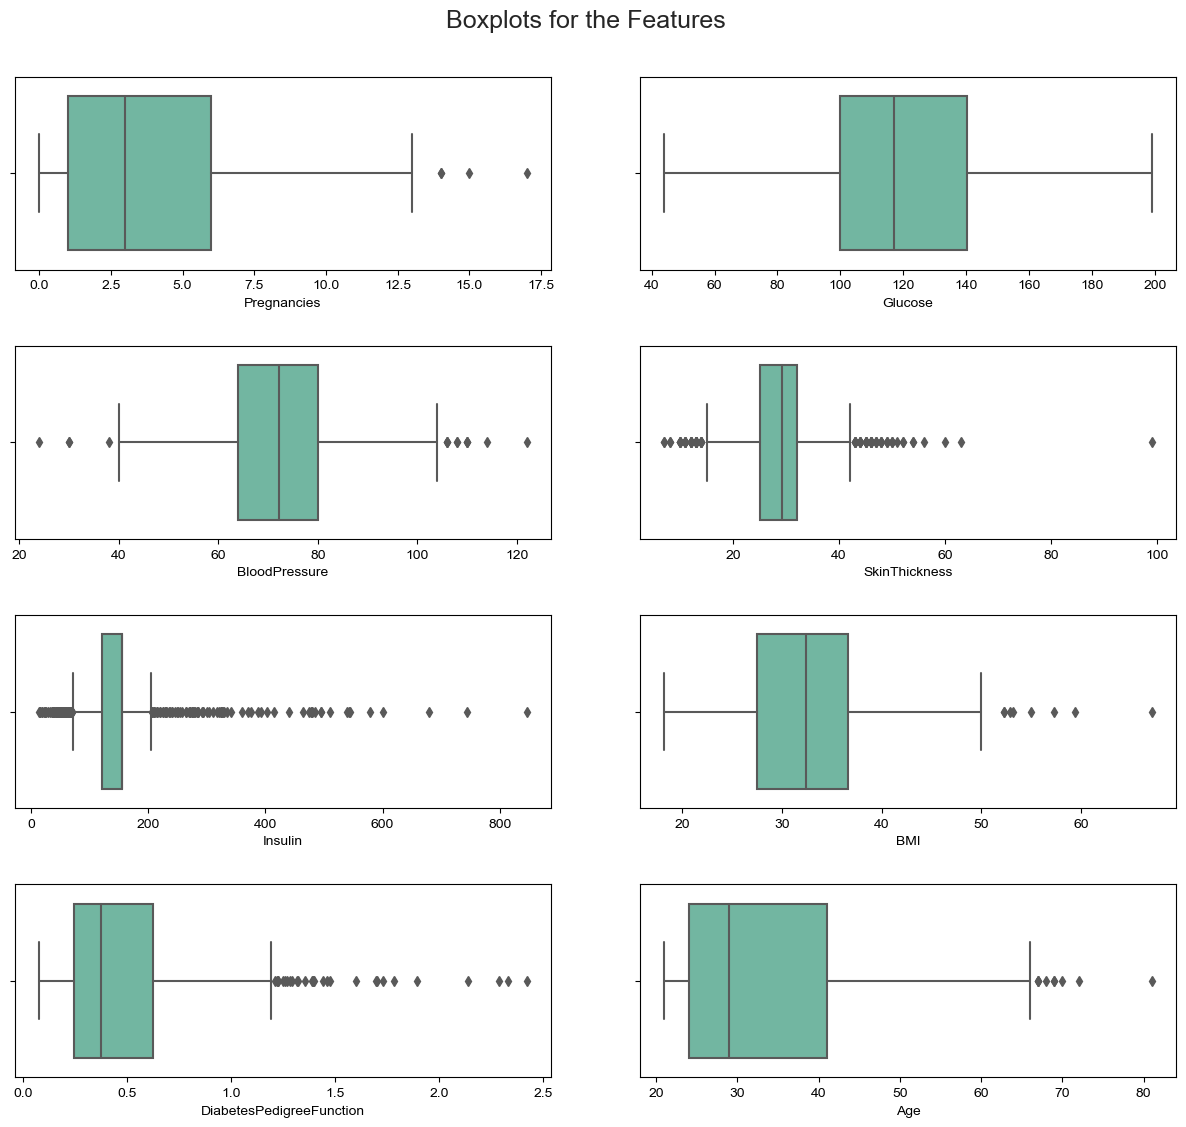

In [10]:
fig, axes = plt.subplots(4, 2, figsize=(13, 12)) # Create a 4x2 subplot figure for the 8 variables
sns.set(style="whitegrid")
plt.suptitle("Boxplots for the Features",fontsize=18, y=0.95)
plt.subplots_adjust(hspace=0.5) # Adjust the vertical spacing between the subplots
plt.tight_layout(pad=3) #Adjust the padding between the subplots and the figure edges
#
for i, ax in zip(diabetes.columns[0:-1].tolist(),axes.flat):
    sns.boxplot(x=i, data=diabetes, ax=ax,palette="Set2",dodge=True, orient='h') #Display the plots side by side

#### Create a function that  standardizes all values and removes any observation (or record) containing a outlier based on the z-score threshold (usually 3)

In [11]:
def remove_outliers_by_row(df, columns, threshold=3):
    new_df = df.copy()
    for column in columns:
        z_scores = (df[column] - df[column].mean()) / df[column].std() #the formula for calculating the zxore
        new_df = new_df[abs(z_scores) < threshold]
    return new_df.reset_index(drop=True)

In [12]:
#Apply the function
diabetes_clean =remove_outliers_by_row(diabetes, ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                                  'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [13]:
diabetes_clean.shape

(719, 9)

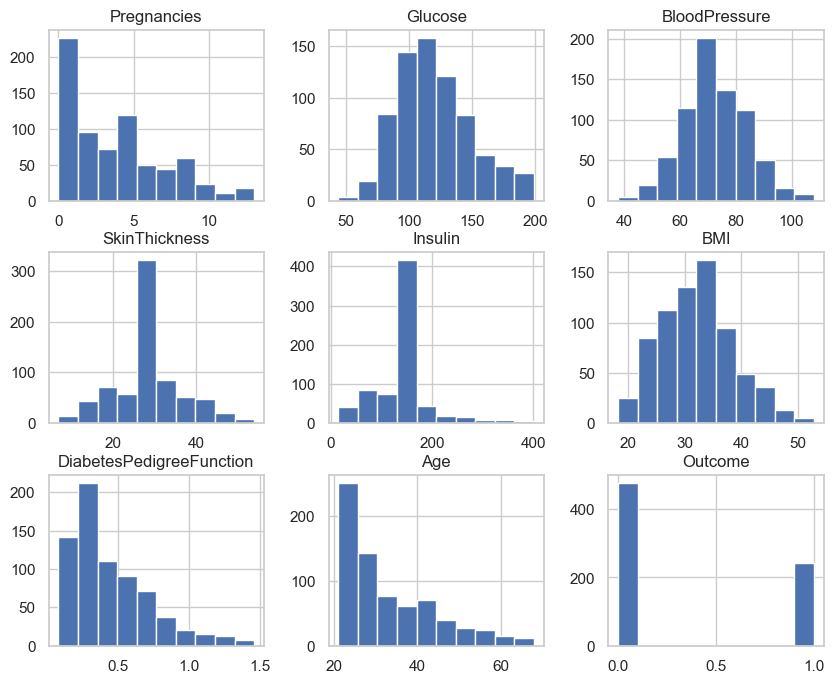

In [14]:
#Check Distribution
diabetes_clean.hist(figsize= (10,8));

#### See the correlation of each variable with the Outcome to select candidate variables for feature extraction

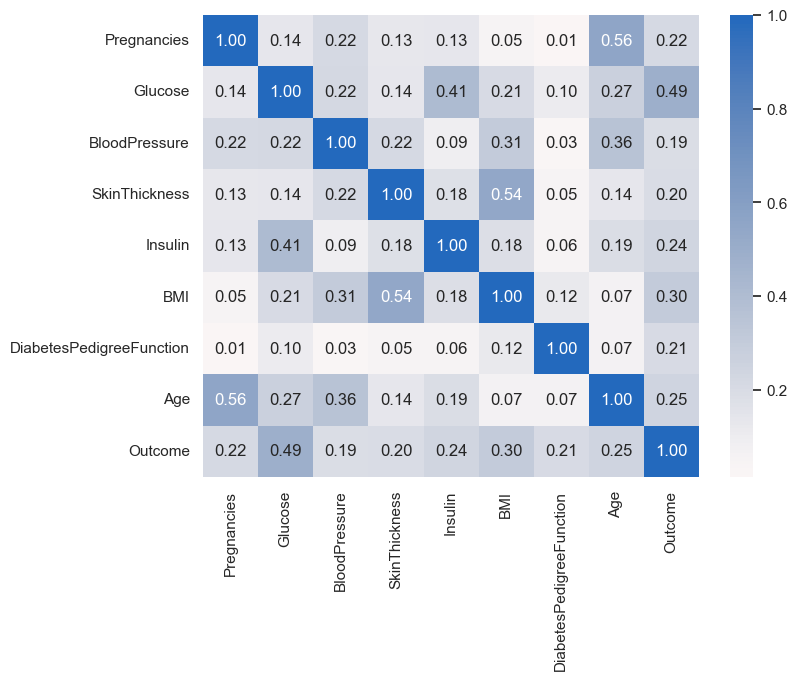

In [15]:
plt.figure(figsize = [8, 6])
sns.heatmap(diabetes_clean.corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0);

#### Observation: The highest correlations with the outcome are with Glucose, BMI, Age, Pregnancies, and Insulin. The next step is to investigate those variables further

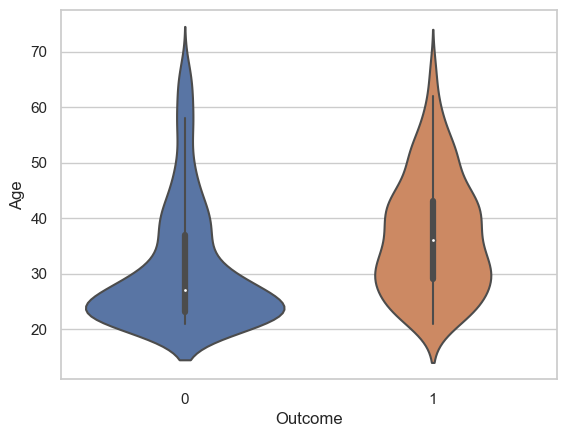

In [16]:
sns.violinplot(data=diabetes_clean, x='Outcome', y='Age');

#### Observation: It seems people 32  and younger are more likely not  to have diabetes

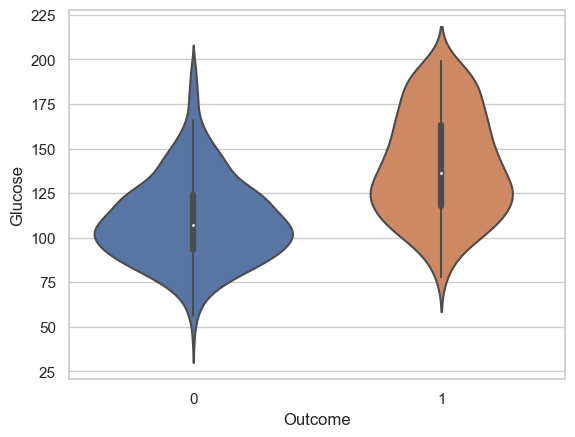

In [17]:
sns.violinplot(data=diabetes_clean, x='Outcome', y='Glucose');

#### Observation: It seems people with glucose level of 150 and above are more likely to have diabetes

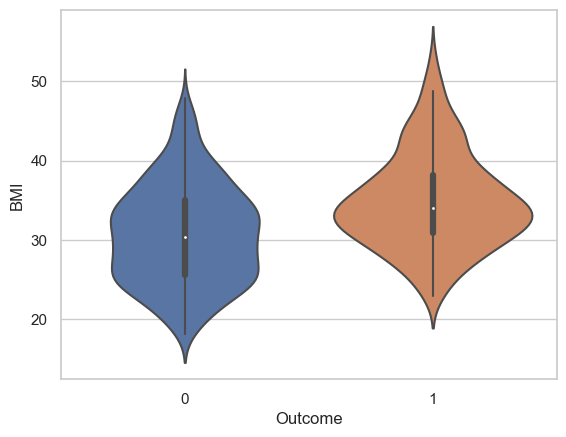

In [18]:
sns.violinplot(data=diabetes_clean, x='Outcome', y='BMI');

#### Observation: People with BMI above 40 are more likely to have diabetes

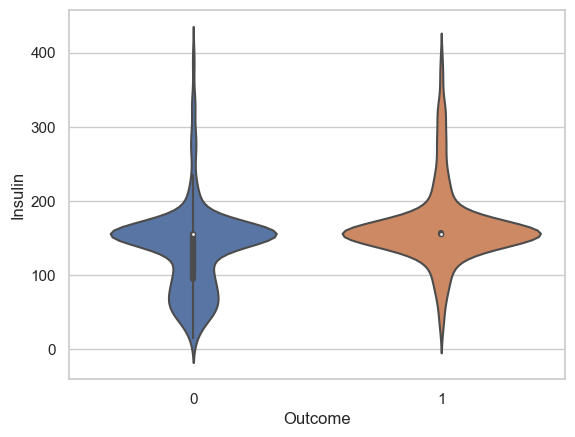

In [19]:
sns.violinplot(data=diabetes_clean, x='Outcome', y='Insulin');

#### Observation: People of Insulin of 100 and below tend NOT to have diabetes. 

### Feature Engineering
>#### Create new variables based on the observation above

In [20]:
diabetes_clean['Glucose_BMI'] = np.log(diabetes_clean['Glucose']) **2 *np.log(diabetes_clean['BMI'])**2
diabetes_clean['Preg_Glucose_BMI'] = (diabetes_clean['Glucose_BMI'] + diabetes_clean['Pregnancies'])
diabetes_clean['BMI_Category'] = pd.cut(diabetes_clean['BMI'], bins=[0, 18.5, 25, 30, 35, 40, np.inf], labels=['Underweight', 'Normal', 'Overweight', 'Obese Class I', 'Obese Class II', 'Obese Class III'])
diabetes_clean['Age_Category'] = pd.cut(diabetes_clean['Age'], bins=[0, 30, 45, 60, np.inf], labels=['30 or younger', '31-45', '46-60', 'Above 60'])
diabetes_clean['Glucose_Category'] = pd.cut(diabetes_clean['Glucose'], bins=[0, 70, 100, 126,np.inf], labels=['Low', 'Normal', 'Prediabetes', 'Diabetes'])

In [21]:
#Check the statistics of the new variables
diabetes_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,719.0,3.841446,3.279022,0.000000,1.000000,3.000000,6.000000,13.000000
Glucose,719.0,120.047891,29.642216,44.000000,99.000000,115.000000,138.000000,199.000000
BloodPressure,719.0,72.290370,11.327116,38.000000,64.000000,72.000000,80.000000,108.000000
SkinThickness,719.0,28.768993,8.154910,7.000000,25.000000,29.153420,32.000000,54.000000
Insulin,719.0,146.020735,56.968123,15.000000,120.000000,155.548223,155.548223,402.000000
BMI,719.0,32.139245,6.475020,18.200000,27.400000,32.100000,36.100000,52.900000
DiabetesPedigreeFunction,719.0,0.449220,0.282790,0.078000,0.242000,0.362000,0.600000,1.461000
Age,719.0,32.922114,11.309623,21.000000,24.000000,29.000000,40.000000,68.000000
Outcome,719.0,0.336579,0.472868,0.000000,0.000000,0.000000,1.000000,1.000000
Glucose_BMI,719.0,271.737499,46.627203,148.372779,237.534319,269.692804,300.251789,410.483759


#### Check the correlation again to see if the new variables are correlated with the Outcome

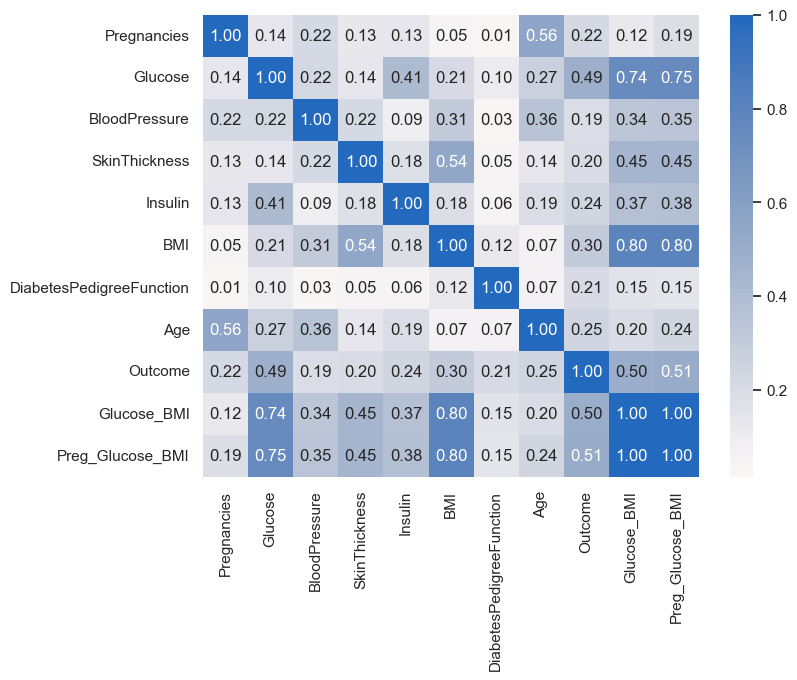

In [22]:
plt.figure(figsize = [8, 6])
sns.heatmap(diabetes_clean.corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0);

In [23]:
diabetes_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_BMI,Preg_Glucose_BMI,BMI_Category,Age_Category,Glucose_Category
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,308.453096,314.453096,Obese Class I,46-60,Diabetes
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,212.458153,213.458153,Overweight,31-45,Normal
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,269.019837,277.019837,Normal,31-45,Diabetes
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,224.192425,225.192425,Overweight,30 or younger,Normal
4,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30,0,237.590015,242.590015,Overweight,30 or younger,Prediabetes


### Check the proportion of the Outcome dependent variable to know if it's balanced or not 

0    0.663421
1    0.336579
Name: Outcome, dtype: float64


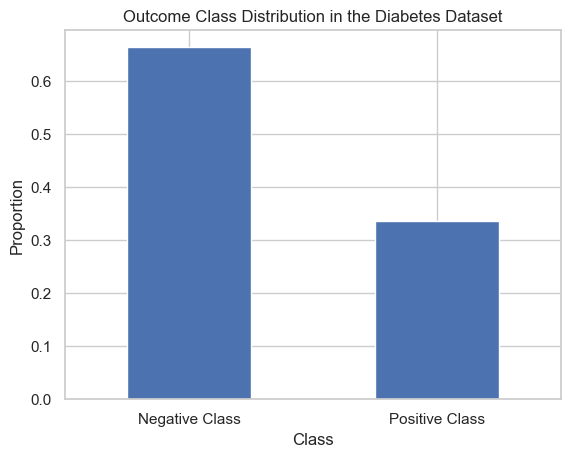

In [24]:
print(diabetes_clean.Outcome.value_counts(normalize=True))
diabetes_clean.Outcome.map({0: 'Negative Class', 1: 'Positive Class'}).value_counts(normalize=True).plot(kind='bar', rot =0)
plt.title('Outcome Class Distribution in the Diabetes Dataset')
plt.ylabel('Proportion')
plt.xlabel('Class');

#### Observation: It's a slightly imbalanced dataset as the negatives are more than the positives and there is a high likelihood that the classifier overfits to the majority class (in this case, the negatives). This should be addressed before implementing the models

In [25]:
#Highlight columns to scale and encode
columns_to_scale=[0,1,2,3,4,5,6,7,8,9]
columns_to_encode=[10,11,12]

### Separate the features and label

In [26]:
X = diabetes_clean.drop('Outcome', axis=1)  # features
y = diabetes_clean['Outcome']            # label

### Split the Dataset
>#### Stratify the label so that appropriate proportion would be represented in the train and test sets based on the split ratio

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=seed)

### Address the Observed Class Imbalance with Synthetic Minority Oversampling Technique (SMOTE)

In [28]:
!pip install imbalanced-learn

from imblearn.over_sampling import  SMOTENC #SMOTENC can handle both categorical and numerical data
smote = SMOTENC(columns_to_encode,random_state=seed)

X_train, y_train = smote.fit_resample(X_train, y_train)

In [29]:
#Import preprocessing and metrics libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import f1_score, roc_curve, auc,RocCurveDisplay,confusion_matrix, classification_report,accuracy_score, precision_score, recall_score, roc_auc_score

# Model 1: Logistic Regression

### Copy the data


In [30]:
X_train_logit = X_train.copy()
X_test_logit = X_test.copy()
y_train_logit =y_train.copy()
y_test_logit =y_test.copy()

### Hyperparameter Tuning to Find the Best Parameters

In [31]:
#Select model
from sklearn.linear_model import LogisticRegression
logit =LogisticRegression(random_state=seed)


# Create the column transformer
preprocessor_logit = ColumnTransformer(
    transformers=[('scaler', StandardScaler(), columns_to_scale),('encoder', OrdinalEncoder(categories=[['Underweight', 'Normal', 'Overweight', 'Obese Class I', 'Obese Class II', 'Obese Class III'],
                                                                                                              ['30 or younger', '31-45', '46-60', 'Above 60'],
                                                                                                             ['Low', 'Normal', 'Prediabetes', 'Diabetes']]),columns_to_encode)], remainder='passthrough')

#Create Pipeline
logit_pipeline = Pipeline(steps=[('preprocessor_logit', preprocessor_logit),  #for scaling the features
                                  ('logit', logit)])
#Specify parameters to tune
param_logit = {'logit__penalty': ['l1', 'l2'],   #type of regularization
# 
               'logit__C': [0.001, 0.01, 0.1, 1, 10, 100], #strength of regularization
               'logit__class_weight': ['balanced', None], # class weights to balance data
              'logit__solver': ['liblinear', 'saga'],# optimization algorithm to use
               'logit__max_iter': [100, 500, 1000], # maximum number of iterations
              'logit__fit_intercept': [True, False]} # whether to fit the intercept

#search for the best parameters to get the best roc_auc score
grid_logit = GridSearchCV(logit_pipeline, param_logit, cv=num_cv_folds, verbose=0, scoring=scoring_metric) 


grid_logit.fit(X_train_logit, y_train_logit)

print("Best parameters:", grid_logit.best_params_)
print("Best score:", grid_logit.best_score_)

Best parameters: {'logit__C': 100, 'logit__class_weight': 'balanced', 'logit__fit_intercept': False, 'logit__max_iter': 500, 'logit__penalty': 'l1', 'logit__solver': 'liblinear'}
Best score: 0.7915926179084074


### Use the best Parameters

In [32]:
best_model_logit = grid_logit.best_estimator_
best_model_logit.fit(X_train_logit, y_train_logit)

#Make Predictions on the test data
y_pred_logit = best_model_logit.predict(X_test_logit)

### Compute the metrics

In [33]:
cm_logit = confusion_matrix(y_test_logit, y_pred_logit)
f1_logit = f1_score(y_test_logit, y_pred_logit)
cr_logit=classification_report(y_test_logit, y_pred_logit)
pr_logit=precision_score(y_test_logit, y_pred_logit)
acc_logit=accuracy_score(y_test_logit, y_pred_logit)
re_logit=recall_score(y_test_logit, y_pred_logit)

In [34]:
# Print the classification report and the confusion matrix
print('Confusion matrix:\n\n', cm_logit)
print('\nClassification report:\n', cr_logit)

Confusion matrix:

 [[84 12]
 [16 32]]

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86        96
           1       0.73      0.67      0.70        48

    accuracy                           0.81       144
   macro avg       0.78      0.77      0.78       144
weighted avg       0.80      0.81      0.80       144



### Plot the Confusion Matrix

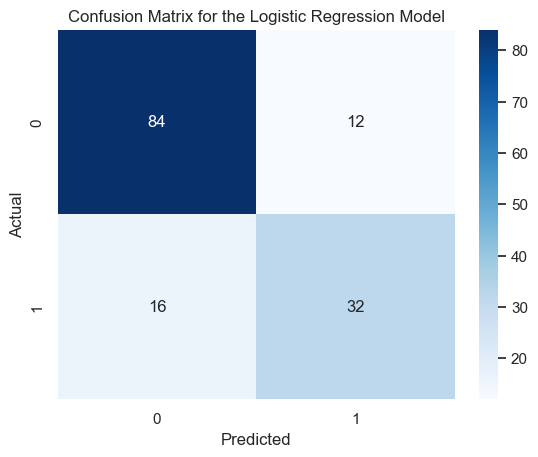

In [35]:
sns.heatmap(cm_logit, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the Logistic Regression Model');

#### Interpretation: 
>The Upper Left values represent the Negatives correctly identified: True Negatives

>The Lower Left values represent the Positives incorrectly identified as Negatives: False Negatives

>The Upper Right values represent the Negatives incorrectly identified as Positives: False Positives

>The Lower Right values represent the Positives correctly identified as Positives: True Positives

**This interpretation is valid for the confusion matrices of other models in this notebook**

### Calculate Specificity and Sensitivity

In [36]:
tn_logit, fp_logit, fn_logit, tp_logit = cm_logit.ravel()

sensitivity_logit = tp_logit / (tp_logit + fn_logit)
specificity_logit = tn_logit / (tn_logit + fp_logit)

print("Sensitivity: {:.2f}".format(sensitivity_logit))
print("Specificity: {:.2f}".format(specificity_logit))

Sensitivity: 0.67
Specificity: 0.88


### Plot the ROC_AUC 

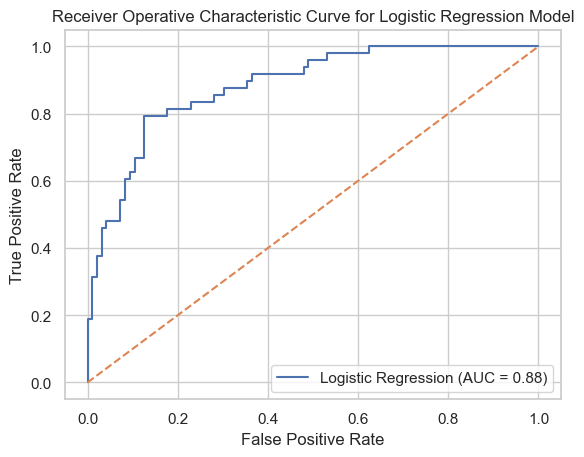

In [37]:
# Predict probabilities
y_pred_proba_logit = best_model_logit.predict_proba(X_test_logit)[:, 1]

# Compute ROC curve and ROC AUC score
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_test_logit, y_pred_proba_logit)
roc_auc_logit = roc_auc_score(y_test_logit, y_pred_proba_logit)

# Plot ROC curve
roc_display_logit = RocCurveDisplay(fpr=fpr_logit, tpr=tpr_logit, roc_auc=roc_auc_logit, estimator_name='Logistic Regression')
roc_display_logit.plot()

# Add diagonal line
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('Receiver Operative Characteristic Curve for Logistic Regression Model');

# Model 2: KNN Classfication

### Copy the data

In [38]:
X_train_knn = X_train.copy()
X_test_knn = X_test.copy()
y_train_knn =y_train.copy()
y_test_knn =y_test.copy()

### Hyperparameter Tuning to Find the Best Parameters

In [39]:
#Select model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()  

# Create the column transformer
preprocessor_knn = ColumnTransformer(
    transformers=[('scaler', StandardScaler(), columns_to_scale),('encoder', OrdinalEncoder(categories=[['Underweight', 'Normal', 'Overweight', 'Obese Class I', 'Obese Class II', 'Obese Class III'],
                                                                                                              ['30 or younger', '31-45', '46-60', 'Above 60'],
                                                                                                             ['Low', 'Normal', 'Prediabetes', 'Diabetes']]),columns_to_encode)], remainder='passthrough')

#Create Pipeline
knn_pipeline = Pipeline(steps=[('preprocessor_knn', preprocessor_knn),  #for scaling the features
                                  ('knn', knn)])
#Specify parameters to tune
param_knn = {'knn__n_neighbors': [3, 5, 7, 9],
            'knn__weights': ['uniform', 'distance'],
            'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'knn__p': [1, 2]}

#search for the best parameters to get the best roc_auc score
grid_knn = GridSearchCV(knn_pipeline, param_knn, cv=num_cv_folds, verbose=0, scoring=scoring_metric) 


grid_knn.fit(X_train_knn, y_train_knn)

print("Best parameters:", grid_knn.best_params_)
print("Best score:", grid_knn.best_score_)

Best parameters: {'knn__algorithm': 'auto', 'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'distance'}
Best score: 0.8005297334244702


### Use the best parameters

In [40]:
best_model_knn = grid_knn.best_estimator_
best_model_knn.fit(X_train_knn, y_train_knn)

#Make Predictions on the test data
y_pred_knn = best_model_knn.predict(X_test_knn)

### Compute the metrics

In [41]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report,accuracy_score, precision_score, recall_score
cm_knn = confusion_matrix(y_test_knn, y_pred_knn)
f1_knn = f1_score(y_test_knn, y_pred_knn)
cr_knn=classification_report(y_test_knn, y_pred_knn)
pr_knn=precision_score(y_test_knn, y_pred_knn)
acc_knn=accuracy_score(y_test_knn, y_pred_knn)
re_knn=recall_score(y_test_knn, y_pred_knn)

In [42]:
# Print the classification report and the confusion matrix
print('Confusion matrix:\n\n', cm_knn)
print('\nClassification report:\n', cr_knn)

Confusion matrix:

 [[81 15]
 [14 34]]

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85        96
           1       0.69      0.71      0.70        48

    accuracy                           0.80       144
   macro avg       0.77      0.78      0.77       144
weighted avg       0.80      0.80      0.80       144



### Plot the Confusion Matrix

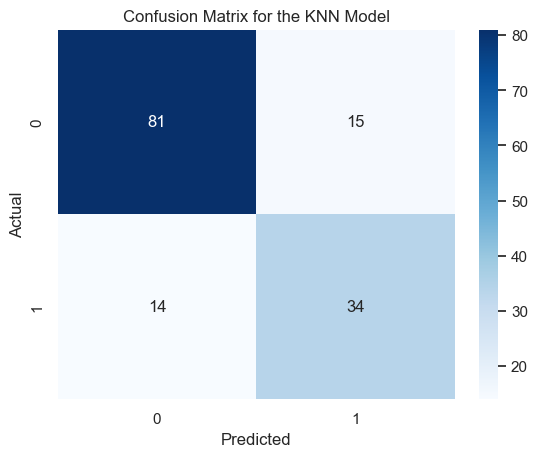

In [43]:
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the KNN Model');

### Calculate Specificity and Sensitivity

In [44]:
tn_knn, fp_knn, fn_knn, tp_knn = cm_knn.ravel()

sensitivity_knn = tp_knn / (tp_knn + fn_knn)
specificity_knn = tn_knn / (tn_knn + fp_knn)

print("Sensitivity: {:.2f}".format(sensitivity_knn))
print("Specificity: {:.2f}".format(specificity_knn))

Sensitivity: 0.71
Specificity: 0.84


### Plot the ROC_AUC

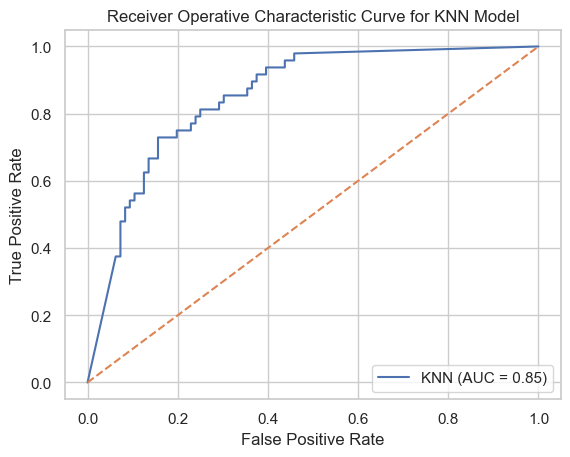

In [45]:
# Predict probabilities
y_pred_proba_knn = best_model_knn.predict_proba(X_test_knn)[:, 1]

# Compute ROC curve and ROC AUC score
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_knn, y_pred_proba_knn)
roc_auc_knn = roc_auc_score(y_test_knn, y_pred_proba_knn)

# Plot ROC curve
roc_display_knn = RocCurveDisplay(fpr=fpr_knn, tpr=tpr_knn, roc_auc=roc_auc_knn, estimator_name='KNN')
roc_display_knn.plot()

# Add diagonal line
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('Receiver Operative Characteristic Curve for KNN Model');

# Model 3: Support Vector Machine (SVM) Classification

### Copy the Data

In [46]:
X_train_svm = X_train.copy()
X_test_svm = X_test.copy()
y_train_svm =y_train.copy()
y_test_svm =y_test.copy()

### Hyperparameter Tuning to Find the Best Parameters
>GridSearchCV is computationally expensive for Support Vector Machines, so I'll deploy RandomizedSearchCV instead

In [47]:
#Choose model
from sklearn.svm import SVC
svm = SVC(random_state=seed, probability=True)

# Create the column transformer
preprocessor_svm = ColumnTransformer(
    transformers=[('scaler', StandardScaler(), columns_to_scale),('encoder', OrdinalEncoder(categories=[['Underweight', 'Normal', 'Overweight', 'Obese Class I', 'Obese Class II', 'Obese Class III'],
                                                                                                              ['30 or younger', '31-45', '46-60', 'Above 60'],
                                                                                                             ['Low', 'Normal', 'Prediabetes', 'Diabetes']]),columns_to_encode)], remainder='passthrough')

#Create Pipeline
svm_pipeline = Pipeline(steps=[('preprocessor_svm', preprocessor_svm),  #for scaling the features
                                  ('svm', svm)])
#Specify parameters to tune
param_svm = [
    {'svm__kernel': ['linear'], 'svm__C': [0.1, 1, 10, 100]}, 
    {'svm__kernel': ['poly'], 'svm__C': [0.1, 1, 10, 100], 'svm__degree': [2, 3, 4]},   
    {'svm__kernel': ['rbf'], 'svm__C': [0.1, 1, 10, 100], 'svm__gamma': [0.1, 1, 10, 100]}
]

#search for the best parameters to get the best roc_auc score
random_svm = RandomizedSearchCV(svm_pipeline, param_svm, cv=num_cv_folds, verbose=0, scoring=scoring_metric, random_state=seed) 


random_svm.fit(X_train_svm, y_train_svm)

print("Best parameters:", random_svm.best_params_)
print("Best score:", random_svm.best_score_)

Best parameters: {'svm__kernel': 'poly', 'svm__degree': 2, 'svm__C': 100}
Best score: 0.7875598086124402


### Use the best parameters

In [48]:
best_model_svm = random_svm.best_estimator_
best_model_svm.fit(X_train_svm, y_train_svm)

#Make Predictions on the test data
y_pred_svm = best_model_svm.predict(X_test_svm)

### Compute the metrics

In [49]:
cm_svm = confusion_matrix(y_test_svm, y_pred_svm)
f1_svm = f1_score(y_test_svm, y_pred_svm)
cr_svm=classification_report(y_test_svm, y_pred_svm)
pr_svm=precision_score(y_test_svm, y_pred_svm)
acc_svm=accuracy_score(y_test_svm, y_pred_svm)
re_svm=recall_score(y_test_svm, y_pred_svm)

In [50]:
# Print the classification report and the confusion matrix
print('Confusion matrix:\n\n', cm_svm)
print('\nClassification report:\n', cr_svm)

Confusion matrix:

 [[81 15]
 [15 33]]

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        96
           1       0.69      0.69      0.69        48

    accuracy                           0.79       144
   macro avg       0.77      0.77      0.77       144
weighted avg       0.79      0.79      0.79       144



### Plot the Confusion Matrix

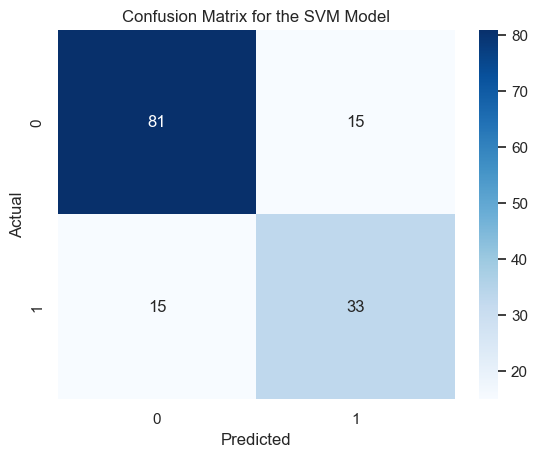

In [51]:
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the SVM Model');

### Calculate Specificity and Sensitivity

In [52]:
tn_svm, fp_svm, fn_svm, tp_svm = cm_svm.ravel()

sensitivity_svm = tp_svm / (tp_svm + fn_svm)
specificity_svm = tn_svm / (tn_svm + fp_svm)

print("Sensitivity: {:.2f}".format(sensitivity_svm))
print("Specificity: {:.2f}".format(specificity_svm))

Sensitivity: 0.69
Specificity: 0.84


### Plot the ROC_AUC

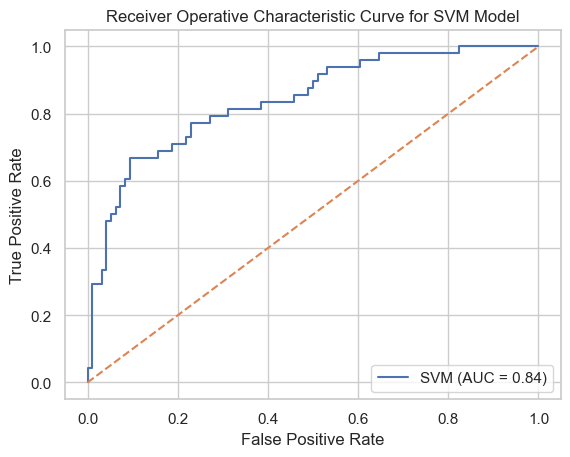

In [53]:
# Predict probabilities
y_pred_proba_svm = best_model_svm.predict_proba(X_test_svm)[:, 1]

# Compute ROC curve and ROC AUC score
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test_svm, y_pred_proba_svm)
roc_auc_svm = roc_auc_score(y_test_svm, y_pred_proba_svm)

# Plot ROC curve
roc_display_svm = RocCurveDisplay(fpr=fpr_svm, tpr=tpr_svm, roc_auc=roc_auc_svm, estimator_name='SVM')
roc_display_svm.plot()

# Add diagonal line to represent a random classifier
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('Receiver Operative Characteristic Curve for SVM Model');

# Model 4: Decision Tree Classification

### Copy the Data

In [54]:
X_train_dt = X_train.copy()
X_test_dt = X_test.copy()

y_train_dt =y_train.copy()
y_test_dt =y_test.copy()

### Hyperparameter Tuning to Find the Best Parameters
>GridSearchCV is also computationally expensive for Decision Trees, so I'll deploy RandomizedSearchCV instead

In [55]:
#Choose model
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier(random_state=seed)

# Create the column transformer
preprocessor_dt = ColumnTransformer(
    transformers=[('scaler', StandardScaler(), columns_to_scale),('encoder', OrdinalEncoder(categories=[['Underweight', 'Normal', 'Overweight', 'Obese Class I', 'Obese Class II', 'Obese Class III'],
                                                                                                              ['30 or younger', '31-45', '46-60', 'Above 60'],
                                                                                                             ['Low', 'Normal', 'Prediabetes', 'Diabetes']]),columns_to_encode)], remainder='passthrough')

#Create Pipeline
dt_pipeline = Pipeline(steps=[('preprocessor_dt', preprocessor_dt),  #for scaling the features
                                  ('dt', dt)])
#Specify parameters to tune
param_dt = {
    'dt__criterion': ['gini', 'entropy'],  # Criterion to measure the quality of split.
    'dt__max_depth': [None, 2, 4, 6, 8, 10], # Maximum depth of the tree
    'dt__min_samples_split': [2, 4, 6, 8], # Minimum number of samples required to split an internal node.
    'dt__min_samples_leaf': [1, 2, 3, 4], # Minimum number of samples required to be at a leaf node.
    'dt__max_features': ['auto', 'sqrt', 'log2'], # The number of features to consider when looking for the best split
    'dt__class_weight': [None, 'balanced']
}

#search for the best parameters to get the best roc_auc score
random_dt = RandomizedSearchCV(dt_pipeline, param_dt, cv=num_cv_folds, random_state=seed,n_iter=10, verbose=0, scoring=scoring_metric) 


random_dt.fit(X_train_dt, y_train_dt)

print("Best parameters:", random_dt.best_params_)
print("Best score:", random_dt.best_score_)

Best parameters: {'dt__min_samples_split': 8, 'dt__min_samples_leaf': 3, 'dt__max_features': 'auto', 'dt__max_depth': 6, 'dt__criterion': 'entropy', 'dt__class_weight': None}
Best score: 0.753298017771702


### Use the best parameters

In [56]:
best_model_dt = random_dt.best_estimator_
best_model_dt.fit(X_train_dt, y_train_dt)

#Make Predictions on the test data
y_pred_dt = best_model_dt.predict(X_test_dt)

### Compute the metrics

In [57]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report,accuracy_score, precision_score, recall_score
cm_dt = confusion_matrix(y_test_dt, y_pred_dt)
f1_dt = f1_score(y_test_dt, y_pred_dt)
cr_dt=classification_report(y_test_dt, y_pred_dt)
pr_dt=precision_score(y_test_dt, y_pred_dt)
acc_dt=accuracy_score(y_test_dt, y_pred_dt)
re_dt=recall_score(y_test_dt, y_pred_dt)
roc_dt=roc_auc_score(y_test_dt, y_pred_dt)

In [58]:
# Print the classification report and the confusion matrix
print('Confusion matrix:\n\n', cm_dt)
print('\nClassification report:\n', cr_dt)

Confusion matrix:

 [[83 13]
 [24 24]]

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82        96
           1       0.65      0.50      0.56        48

    accuracy                           0.74       144
   macro avg       0.71      0.68      0.69       144
weighted avg       0.73      0.74      0.73       144



### Plot the Confusion Matrix

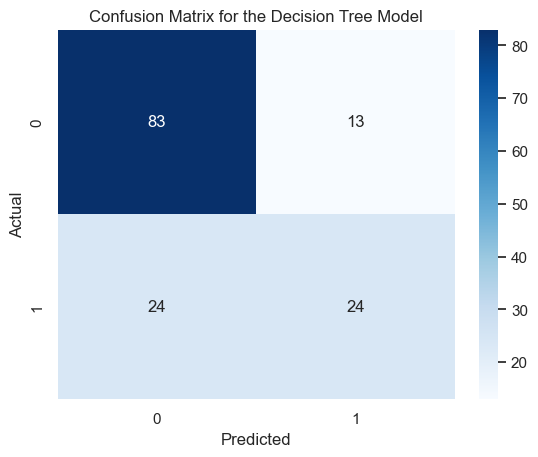

In [59]:
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the Decision Tree Model');

### Calculate the Sensitivity and Specificity

In [60]:
tn_dt, fp_dt, fn_dt, tp_dt = cm_dt.ravel()

sensitivity_dt = tp_dt / (tp_dt + fn_dt)
specificity_dt = tn_dt / (tn_dt + fp_dt)

print("Sensitivity: {:.2f}".format(sensitivity_dt))
print("Specificity: {:.2f}".format(specificity_dt))

Sensitivity: 0.50
Specificity: 0.86


### Plot the ROC_AUC

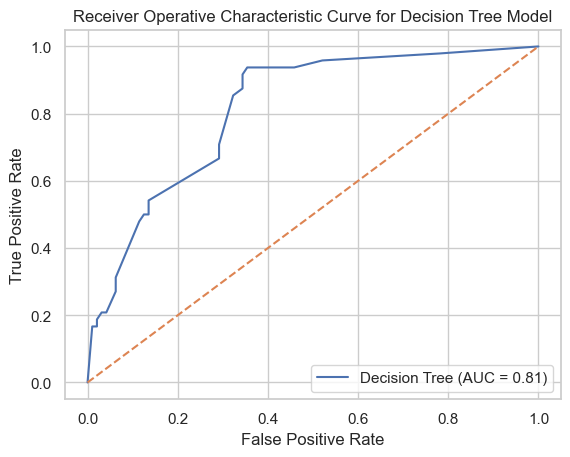

In [61]:
# Predict probabilities
y_pred_proba_dt = best_model_dt.predict_proba(X_test_dt)[:, 1]

# Compute ROC curve and ROC AUC score
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_dt, y_pred_proba_dt)
roc_auc_dt = roc_auc_score(y_test_dt, y_pred_proba_dt)

# Plot ROC curve
roc_display_dt = RocCurveDisplay(fpr=fpr_dt, tpr=tpr_dt, roc_auc=roc_auc_dt, estimator_name='Decision Tree')
roc_display_dt.plot()

# Add diagonal line to represent a random classifier
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('Receiver Operative Characteristic Curve for Decision Tree Model');

### Plot Decison Tree

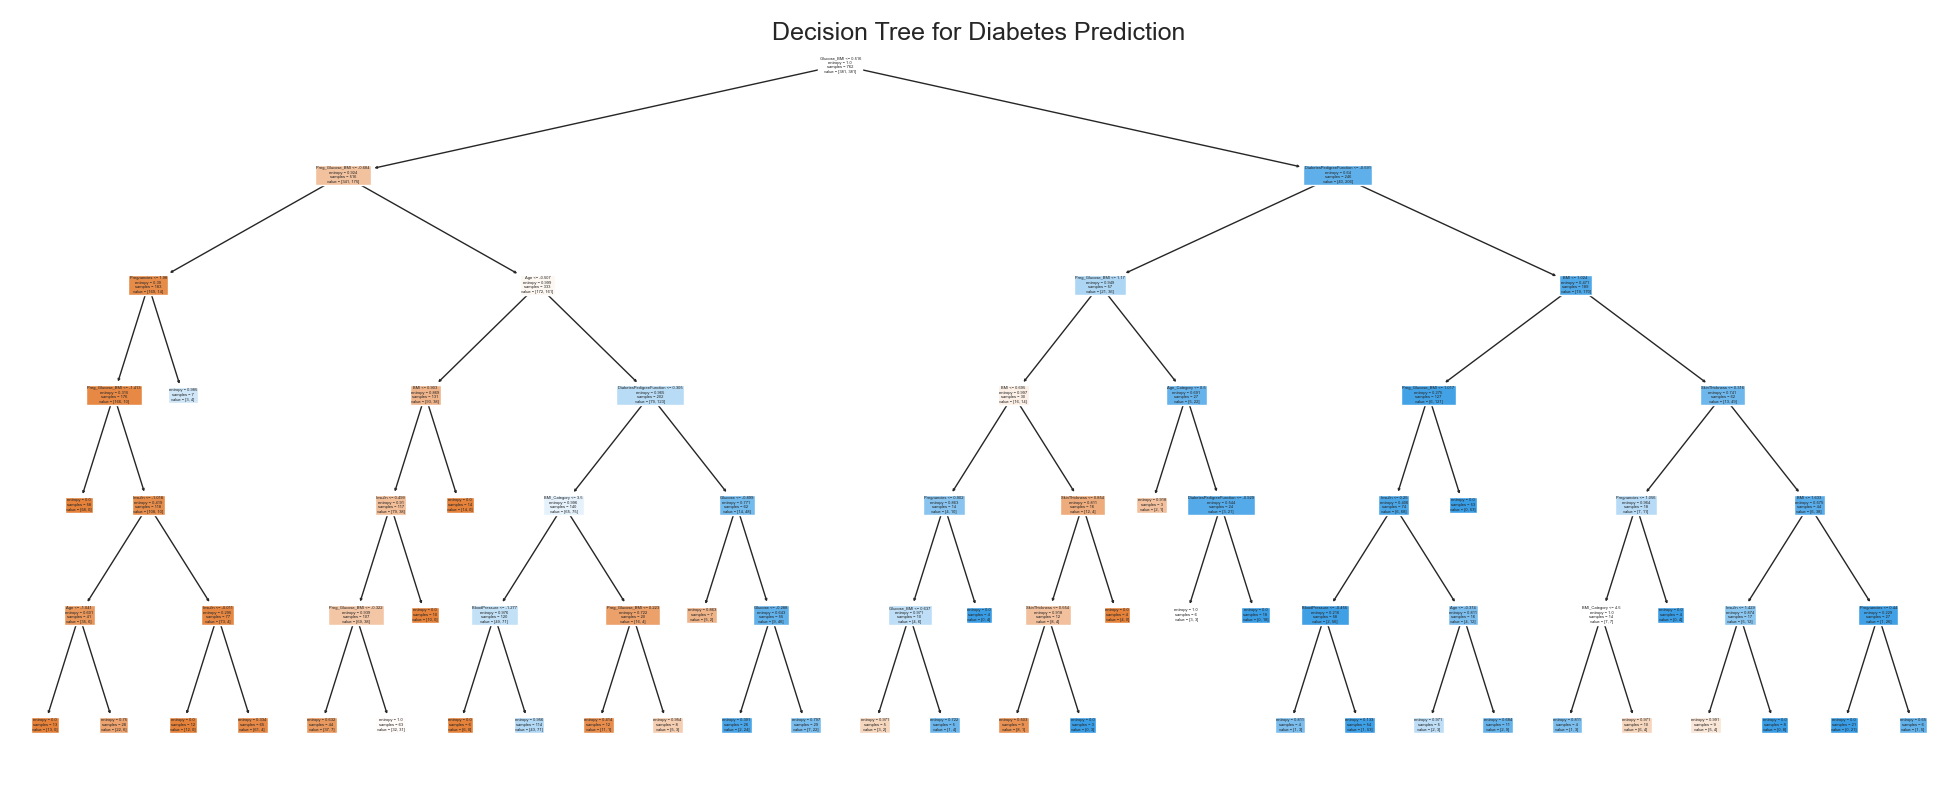

In [62]:
feature_names= X.columns
plt.figure(figsize=(25,10))
plot_tree(best_model_dt.named_steps['dt'], feature_names=feature_names, filled=True)
plt.title('Decision Tree for Diabetes Prediction',fontsize=18, y=0.95);

#### Remarks: Libraries such as graphviz could be used to properly visualize the decision tree if interested

# Model 5: Random Forest Classification

### Copy the data

In [63]:
X_train_rfc = X_train.copy()
X_test_rfc = X_test.copy()
y_train_rfc =y_train.copy()
y_test_rfc =y_test.copy()

### Hyperparameter Tuning to Find the Best Parameters
>GridSearchCV is also computationally expensive for Random Forest, so I'll deploy RandomizedSearchCV instead

In [64]:
#Choose model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=seed)

# Create the column transformer
preprocessor_rfc = ColumnTransformer(
    transformers=[('scaler', StandardScaler(), columns_to_scale),('encoder', OrdinalEncoder(categories=[['Underweight', 'Normal', 'Overweight', 'Obese Class I', 'Obese Class II', 'Obese Class III'],
                                                                                                              ['30 or younger', '31-45', '46-60', 'Above 60'],
                                                                                                             ['Low', 'Normal', 'Prediabetes', 'Diabetes']]),columns_to_encode)], remainder='passthrough')

#Create Pipeline
rfc_pipeline = Pipeline(steps=[('preprocessor_rfc', preprocessor_rfc),  #for scaling the features
                                  ('rfc', rfc)])
#Specify parameters 
param_rfc = {
    
    'rfc__n_estimators': randint(50, 150),
    'rfc__max_depth': [3, 5, 7],
    'rfc__max_features': ['sqrt', 'log2'],
    'rfc__min_samples_split': [2, 4, 6],
    'rfc__min_samples_leaf': [1, 2, 4]
}

#search for the best parameters to get the best roc_auc score
random_rfc = RandomizedSearchCV(rfc_pipeline, param_rfc, cv=num_cv_folds, n_jobs=-1,verbose=0, scoring=scoring_metric, random_state=seed) 


random_rfc.fit(X_train_rfc, y_train_rfc)

print("Best parameters:", random_rfc.best_params_)
print("Best score:", random_rfc.best_score_)

Best parameters: {'rfc__max_depth': 7, 'rfc__max_features': 'sqrt', 'rfc__min_samples_leaf': 2, 'rfc__min_samples_split': 2, 'rfc__n_estimators': 115}
Best score: 0.8098086124401913


### Use the best parameters

In [65]:
best_model_rfc = random_rfc.best_estimator_
best_model_rfc.fit(X_train_rfc, y_train_rfc)

#Make Predictions on the test data
y_pred_rfc = best_model_rfc.predict(X_test_rfc)

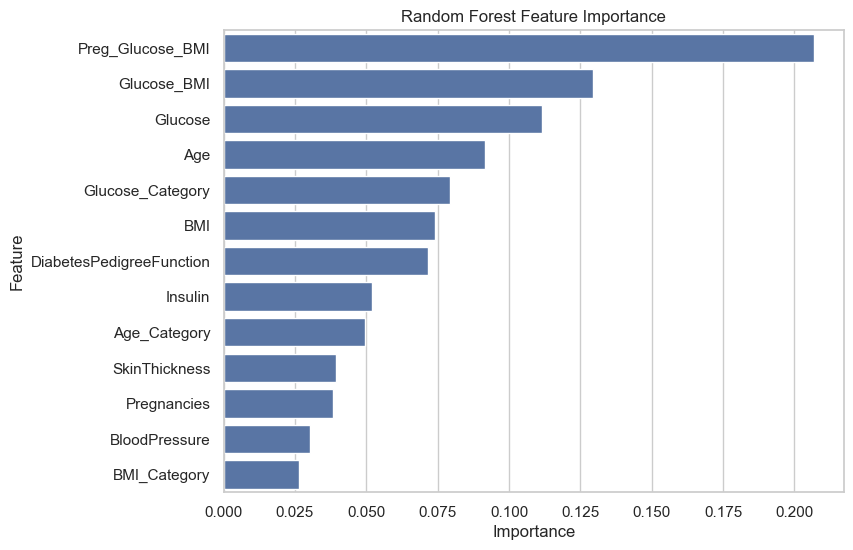

In [66]:
# Extract feature importance from the best model
importance = best_model_rfc.named_steps['rfc'].feature_importances_

# Create dataframe of feature importances and corresponding column names
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort features by importance
feature_importances = feature_importances.sort_values(by=['Importance'], ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, color='b')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature');

#### Observation: Creating new variables certainly helped!

### Compute the metrics

In [67]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report,accuracy_score, precision_score, recall_score
cm_rfc = confusion_matrix(y_test_rfc, y_pred_rfc)
f1_rfc = f1_score(y_test_rfc, y_pred_rfc)
cr_rfc=classification_report(y_test_rfc, y_pred_rfc)
pr_rfc=precision_score(y_test_rfc, y_pred_rfc)
acc_rfc=accuracy_score(y_test_rfc, y_pred_rfc)
re_rfc=recall_score(y_test_rfc, y_pred_rfc)
roc_rfc=roc_auc_score(y_test_rfc, y_pred_rfc)

In [68]:
# Print the classification report and the confusion matrix
print('Confusion matrix:\n\n', cm_rfc)
print('\nClassification report:\n', cr_rfc)

Confusion matrix:

 [[81 15]
 [ 8 40]]

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.88        96
           1       0.73      0.83      0.78        48

    accuracy                           0.84       144
   macro avg       0.82      0.84      0.83       144
weighted avg       0.85      0.84      0.84       144



### Plot the Confusion Matrix

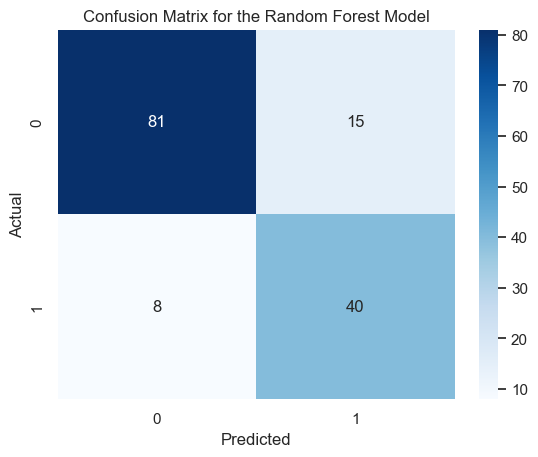

In [69]:
sns.heatmap(cm_rfc, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the Random Forest Model');

### Calculate the Sensitivity & Specificity

In [70]:
tn_rfc, fp_rfc, fn_rfc, tp_rfc = cm_rfc.ravel()

sensitivity_rfc = tp_rfc / (tp_rfc + fn_rfc)
specificity_rfc = tn_rfc / (tn_rfc + fp_rfc)

print("Sensitivity: {:.2f}".format(sensitivity_rfc))
print("Specificity: {:.2f}".format(specificity_rfc))

Sensitivity: 0.83
Specificity: 0.84


### Plot the ROC_AUC

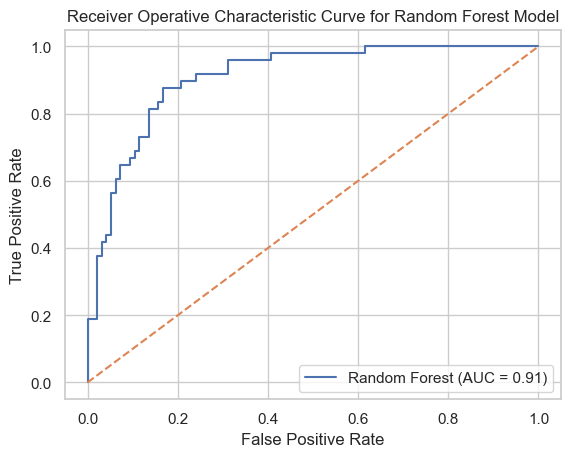

In [71]:
# Predict probabilities
y_pred_proba_rfc = best_model_rfc.predict_proba(X_test_rfc)[:, 1]

# Compute ROC curve and ROC AUC score
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test_rfc, y_pred_proba_rfc)
roc_auc_rfc = roc_auc_score(y_test_rfc, y_pred_proba_rfc)

# Plot ROC curve
roc_display_rfc = RocCurveDisplay(fpr=fpr_rfc, tpr=tpr_rfc, roc_auc=roc_auc_rfc, estimator_name='Random Forest')
roc_display_rfc.plot()

# Add diagonal line to represent a random classifier
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('Receiver Operative Characteristic Curve for Random Forest Model');

# Comparative analysis of the Models

#### Evaluation would be done on the following metrics:
>#### Accuracy: This is how many the proportion of prediction (True Positives and True Negatives) each classifier gets right.
>#### Precision: This is the proportion of the actual positive prediction in all positive predictions (True Positives and False Positives) made by each classifier.
>#### Recall/Sensitivity/True Postive Rate: This indicates the proportion actual positives (True Positive) each classifier identifies correctly out of the actual positives in the data (True Positive and False Negative).
>#### Specificity/True Negative Rate: This is like the negative recall. It Indicates the proportion actual negatives (True Negative) each classifier identifies correctly out of the actual negatives in the data (True Negative and False Positive).  
>#### F1 Score: This is the harmonic mean of the precision and recall scores and It indicates how precise a classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances).
>#### Area Under the Receiver Operating Characteristic Curve (AUROC): This indicates the probability that the classifier will rank a randomly chosen positive example higher than a randomly chosen negative example.


| Metric                      | Description                                                                                                         |
|-----------------------------|--------------------------------------------------------------------------------------------------------------------|
| Accuracy                    | Proportion of correct predictions (True Positives and True Negatives) made by each classifier. Formula: `(TP + TN) / (TP + TN + FP + FN)` |
| Precision                   | Proportion of actual positive instances that are correctly identified by a classifier. Formula: `TP / (TP + FP)` |
| Recall/Sensitivity/TPR      | Proportion of actual positive instances (True Positive) identified correctly by each classifier. Formula: `TP / (TP + FN)` |
| Specificity/TNR             | Proportion of actual negative instances (True Negative) identified correctly by each classifier. Formula: `TN / (TN + FP)` |
| F1 Score                    | The harmonic mean of precision and recall scores, which provides a balance between these two metrics. It is a way to measure the effectiveness of a classifier at both identifying positive instances and avoiding false positives. Formula: `2 * Precision * Recall / (Precision + Recall)` |
| Area Under the ROC Curve    | Measures the ability of a classifier to distinguish between positive and negative instances. |


In [72]:
#Create a comparison dataframe
eval_table = pd.DataFrame({'Model': ['Logistic Regression','KNN', 'Support Vector Machine', 'Decision Tree','Random Forest'],
                            'Specificity (%)': [f'{100*n:.2f}' for n in [specificity_logit, specificity_knn, specificity_svm,specificity_dt,specificity_rfc]],
                            'Recall Score/Sensitivity (%)': [f'{100*n:.2f}' for n in [re_logit, re_knn, re_svm,re_dt,re_rfc]],
                           'AUROC Score (%)': [f'{100*n:.2f}' for n in [roc_auc_logit, roc_auc_knn, roc_auc_svm,roc_auc_dt,roc_auc_rfc]],
                           'F1 Score (%)': [f'{100*n:.2f}' for n in [f1_logit, f1_knn, f1_svm,f1_dt,f1_rfc]],
                            'Accuracy Score (%)': [f'{100*n:.2f}' for n in [acc_logit, acc_knn, acc_svm,acc_dt,acc_rfc]],
                           'Precision Score (%)': [f'{100*n:.2f}' for n in [pr_logit, pr_knn, pr_svm,pr_dt,pr_rfc]],
                          },index=[1,2,3,4,5])

#Highlight the highest score for each metric
eval_table.style.highlight_max(subset=['F1 Score (%)','Specificity (%)', 'Accuracy Score (%)','Precision Score (%)', 'Recall Score/Sensitivity (%)', 'AUROC Score (%)'],axis=0)

,Model,Specificity (%),Recall Score/Sensitivity (%),AUROC Score (%),F1 Score (%),Accuracy Score (%),Precision Score (%)
1,Logistic Regression,87.50,66.67,88.24,69.57,80.56,72.73
2,KNN,84.38,70.83,85.35,70.10,79.86,69.39
3,Support Vector Machine,84.38,68.75,83.90,68.75,79.17,68.75
4,Decision Tree,86.46,50.00,81.49,56.47,74.31,64.86
5,Random Forest,84.38,83.33,90.78,77.67,84.03,72.73


>##### When comparing models, a general guideline is to assess the area under the Receiver Operating Characteristic (ROC) Curve, where models that outperform a random classifier (represented by the diagonal line) are considered good or decent. 

>##### Any model that falls below the diagonal line performs worse than random guessing and is likely not worth considering.

>##### When it comes to assessing the performance of a classifier in modern machine learning, the Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC) are frequently employed tools. Nonetheless, like all tools, they have their limitations. 

>##### In scenarios where accurate probability outputs are important (such as when the true likelihood of an event is of concern like diabetes detection, as opposed to just evaluating model performance), ROC/AUC metrics are inadequate in providing such information. Recall or Sensitivity scores should be considered next to ROC/AUC as they reflect the true positive rate. 

## On this basis and from the evaluation dataframe, *Random Forest* is the best classifier has it has the best AUROC metric, F1 metric, accuracy metric and it has high positive recall (sensitivity) while maintaining a high negative recall (specificity) value: That means it stands a better chance of accurately predicting whether some would have or not have diabetes within the next five years.